In [1]:
import pandas as pd
import numpy as np 

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel("CompanyA.xlsx", engine='openpyxl')

In [4]:
df.head()

Date  ft01  ft02  ft03  ft04  ft05  ft06  ft07  ft08  ft09  ft10  \
0 2018-01-01    21     4    30   0.4   0.4   0.4   -17    98    93    28   
1 2018-02-01    66     8   -40   0.5   0.5   0.5  -100    84    70    52   
2 2018-03-01    85    19   -94   0.6   0.6   0.6    88    92    86    91   
3 2018-04-01    98    18    33   0.7   0.7   0.7    40    71    58    37   
4 2018-05-01    89    46   -53   0.8   0.8   0.8   -26    57    86    24   

   ft11  ft12  ft13  ft14  
0    88    82   -76   -42  
1    60    11     2   -71  
2    23    61    25   -56  
3    80    98    -4   -90  
4    43    23    43    95

In [5]:
df_no_date = df.drop(columns='Date', inplace=False)

In [6]:
%pip install pyod
# Copy some code from https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyod.models.pca import PCA
from pyod.models.lof import LOF
from pyod.models.abod import ABOD

In [8]:
models = {
    'pca': PCA(contamination=0.1, n_components=3),
    'lof': LOF(contamination=0.1),
    'abod': ABOD(contamination=0.1),
}

In [9]:
# Show all detectors
for i, clf in enumerate(models.keys()):
    print('Model', i + 1, clf)

Model 1 pca
Model 2 lof
Model 3 abod


In [10]:
for i, (clf_name, clf) in enumerate(models.items()):
    print(i + 1, 'fitting', clf_name)
    clf.fit(df_no_date)
    outliers = clf.predict(df_no_date)
    df[clf_name] = outliers

1 fitting pca
2 fitting lof
3 fitting abod


In [11]:
df.head()

Date  ft01  ft02  ft03  ft04  ft05  ft06  ft07  ft08  ft09  ft10  \
0 2018-01-01    21     4    30   0.4   0.4   0.4   -17    98    93    28   
1 2018-02-01    66     8   -40   0.5   0.5   0.5  -100    84    70    52   
2 2018-03-01    85    19   -94   0.6   0.6   0.6    88    92    86    91   
3 2018-04-01    98    18    33   0.7   0.7   0.7    40    71    58    37   
4 2018-05-01    89    46   -53   0.8   0.8   0.8   -26    57    86    24   

   ft11  ft12  ft13  ft14  pca  lof  abod  
0    88    82   -76   -42    1    0     1  
1    60    11     2   -71    0    0     0  
2    23    61    25   -56    0    1     0  
3    80    98    -4   -90    0    0     0  
4    43    23    43    95    0    0     0

In [12]:
df.to_excel('outlier_records.xlsx')

In [13]:
# Create feature correlations plot
import plotly
import plotly.figure_factory as ff

features=[k for k in df_no_date.columns]

fig=ff.create_annotated_heatmap(np.array(df_no_date.corr().round(2)),
        colorscale='Viridis',
        x=features,
        y=features,
        hoverongaps = True)

fig.update_layout(
    paper_bgcolor='white', 
    width=1200, height=1200, titlefont=dict(size=25), title_text='Features correlation plot')
fig.update_xaxes(tickangle=90, side='bottom')

fig.show()

<Figure size 640x480 with 0 Axes>

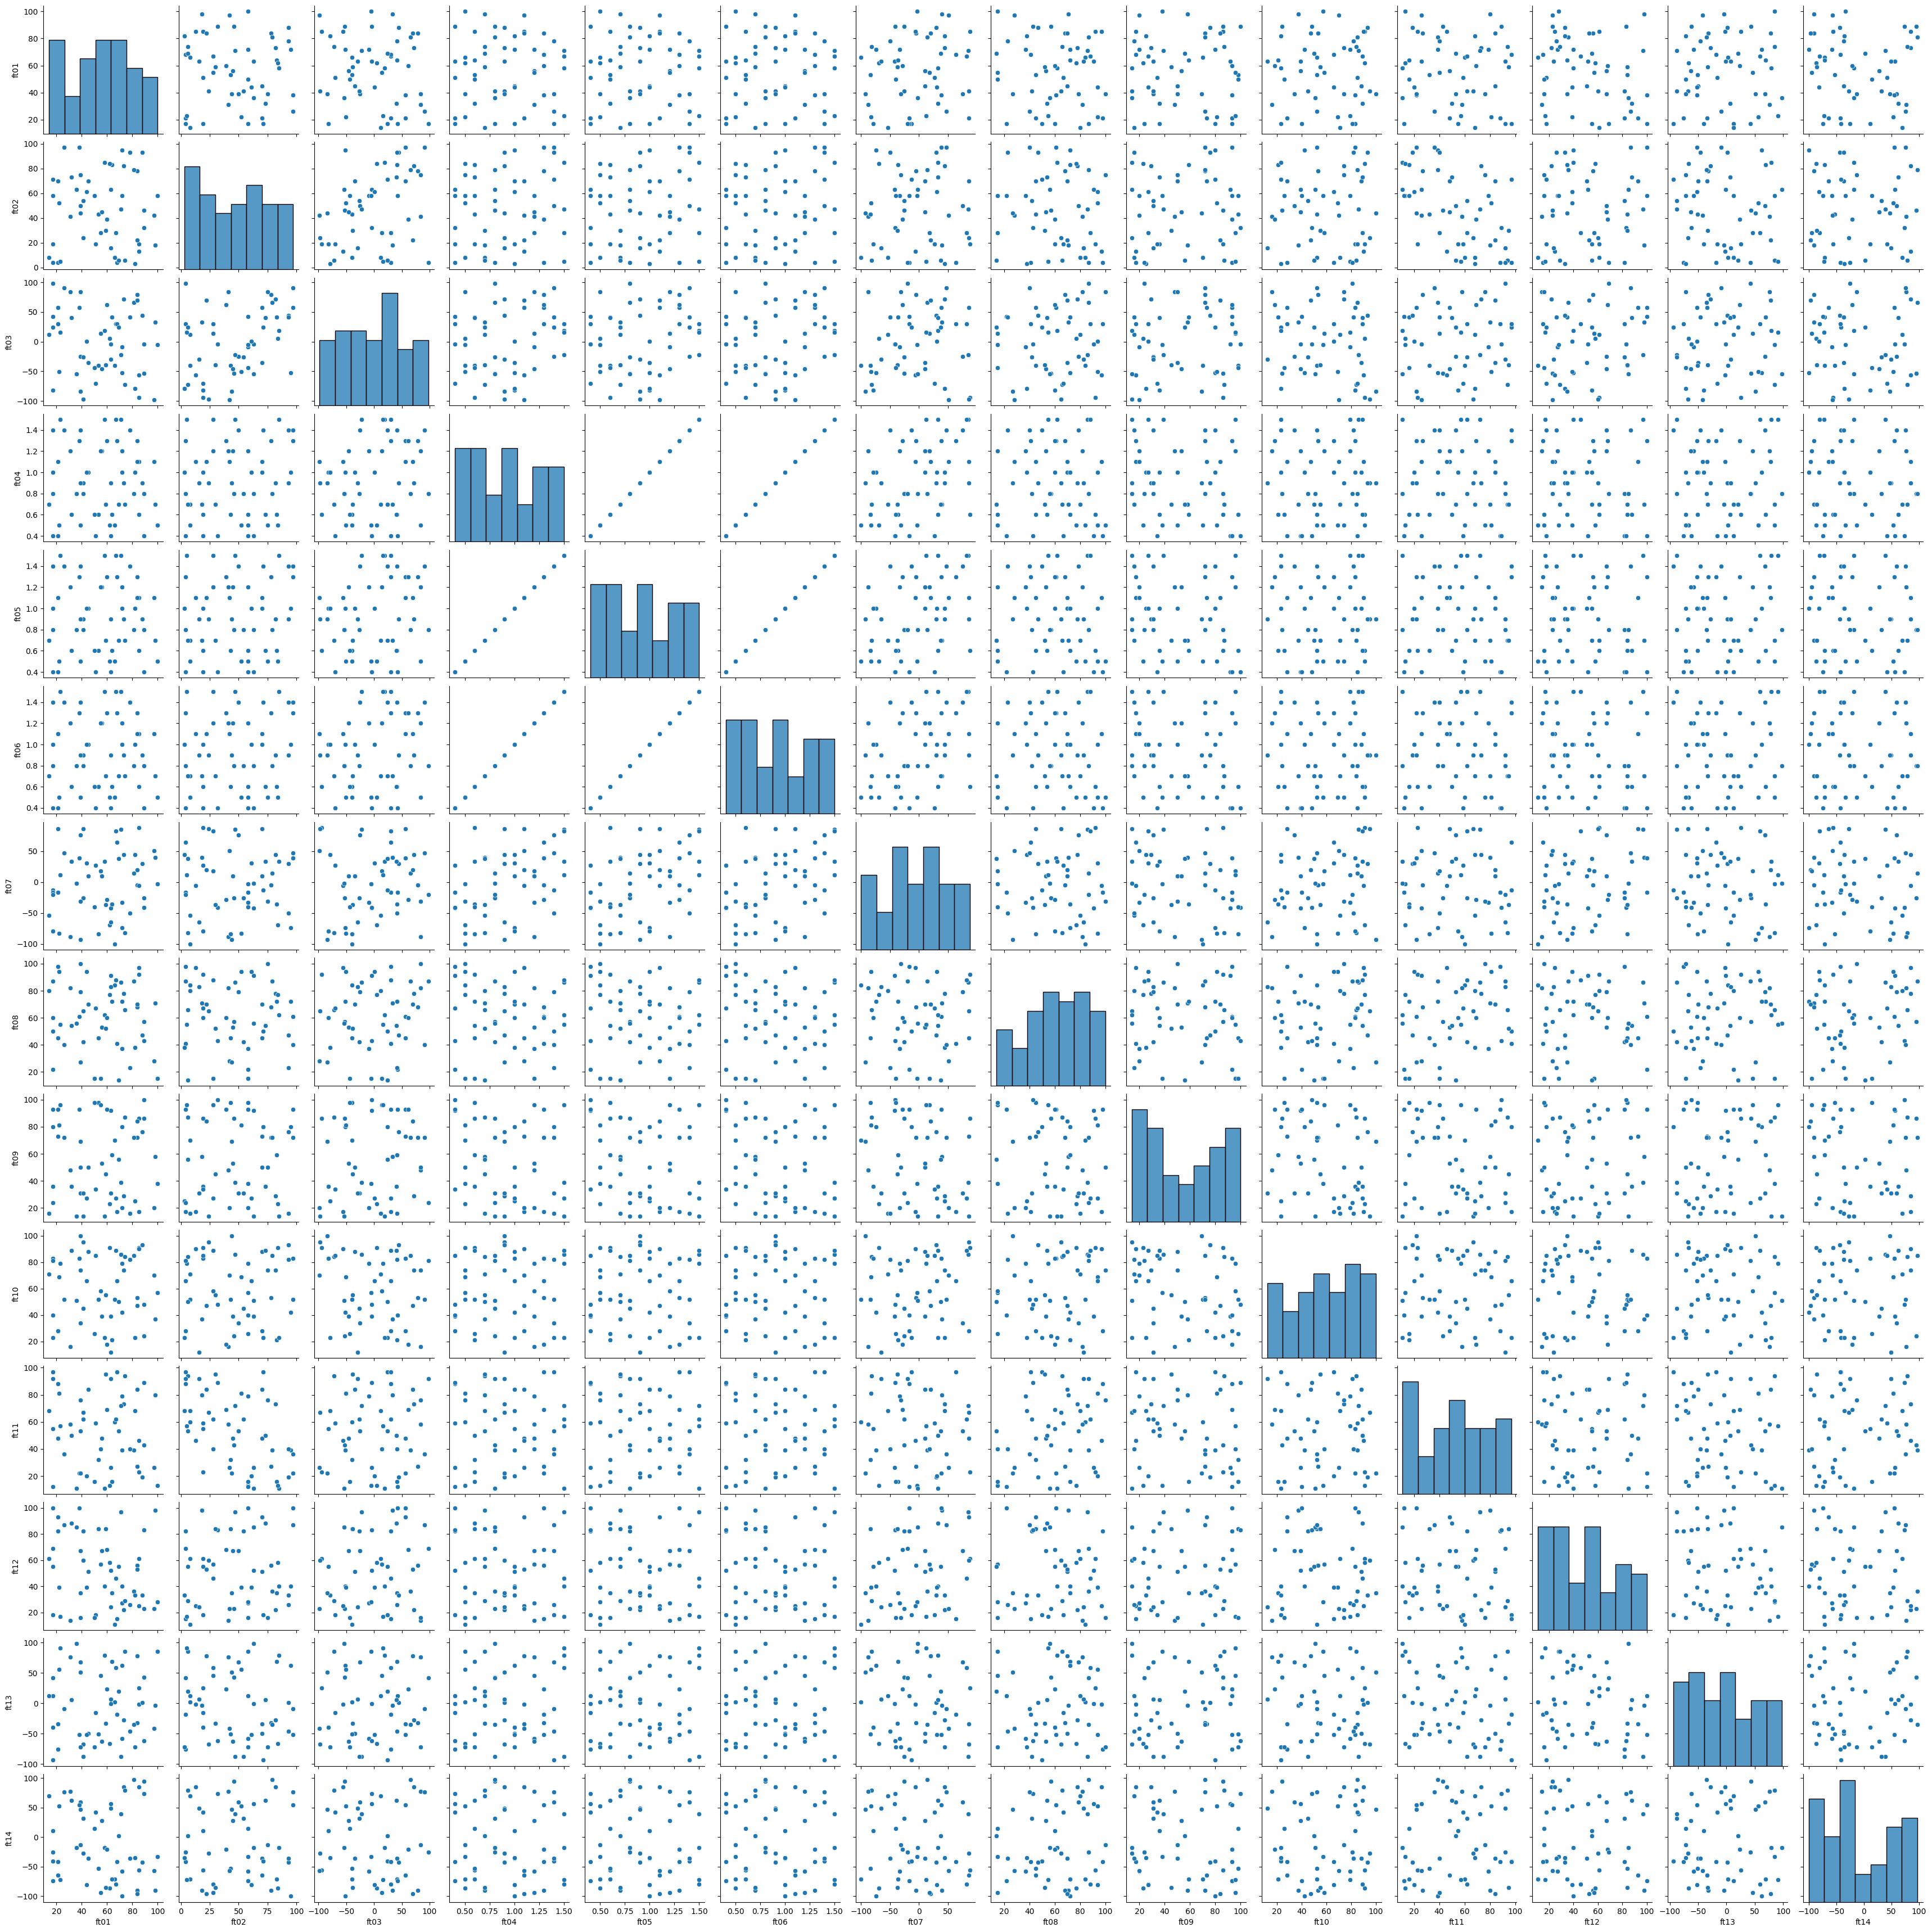

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Let's print a pairplot
# https://doobzncoobz.com/seaborn-pairplot/
plt.figure()
sns_plot = sns.pairplot(df_no_date)
plt.show()
# sns_plot.savefig('')

In [15]:
import plotly.express as px

outlier_column = list(models.keys())[0]

fig=px.scatter_3d(data_frame=df, x='ft01',y='ft02',z='ft03', symbol=outlier_column)

fig.update_layout(margin=dict(l=30, r=30,b=30,t=30), autosize=False, 
    width=1000, 
    height=1000, showlegend=False, title={
                'text': f'Outlier Plot ({outlier_column})',
                'y': 0.91,
                'x': 0.5 ,
                'xanchor': 'center',
                'yanchor': 'top'})

# circle's are outliers, diamonds are normal entries for the specific model
# Let's change the outliers to red X and the rest into green circles
for i, d in enumerate(fig.data):
    if fig.data[i].marker.symbol =='circle' : 
       fig.data[i].marker.symbol = 'x'
       fig.data[i].marker.color='red'
    else: 
        fig.data[i].marker.symbol='circle'
        fig.data[i].marker.color='green'

fig.show()